# Logistic Regression

This code is implementing logistic regression in Python using batch gradient descent.

I will be using the example: "Probability of passing an exam versus hours of study" mentioned here: https://en.wikipedia.org/wiki/Logistic_regression.

In summary, a student can either **pass** or **fail** the class; this means there is a binary outcome of this question. Since 1 and 0 are not cardinal numbers, logistic regression can be used to predict the probability of passing or failing the class of the student. The implemented class will have two constructing parameters; *learning rate* and *periods*. Learning rate is used to limit the correction of each coefficient every time it is updated. Periods, on the other hand, limits the number of iterations as the fit() method depends on the amount.

The *hypothesis function* is a significant element of the class and is used to generate probabilities out of the given data. With the sigmoid calculation, we can have values very close to either 0 or 1, and this makes it suitable for the classification algorithm. As the value approaches zero, the natural algorithm of z goes negative infinity. When z is one, the log of z is zero. Thus the addition of 1 also prevents the dividing by zero exception.

The *loss function* uses cross-entropy for calculation compared to the mean squared error in linear regression. The method uses the status of y as the primary point an gives the output depending either y is one or zero. This makes the returned value either always increasing or always decreasing. In the end, the lost function eases the calculation of gradient and minimizes the cost.

The *fit* method is the primary field of this class, where the computation happens a specific period of time. At the end of each iteration, the generated value, cost, is saved into a list called costs. The final product, costs, is used to plot and calculating the converged value. 

The functions, *get_probabilities()*, and *predict()*, give a prediction based on the original data on the passing grade. The first function takes the information, create a matrix with 1's, and returns of its sigmoid value. This is used in the predict() method, which is compared to the required threshold. In our problem, the threshold called pass_grade as it concerns only this data for the coursework.

If the data changes, the threshold needs to be changed in the predict method so we can comply with requirements.

In [120]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
# Original data in the Coursework brief
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], 
                 [4.75], [1.75], [3.25], [5.00], [2.00], [2.25], [2.50], 
                 [2.75], [3.50], [4.00], [4.25], [4.50], [5.50]])
y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])

# Create training sets
X_train = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75], [1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75]])
y_train = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1])

# Create test sets
X_test = np.asarray ([[3.50], [4.00], [4.25], [4.50], [5.50]])
y_test = np.asarray([1,1,1,1,1])

**Class Implementation**

The primary class, excluding the constructor, consisting of 8 functions; and 5 of them are actively used during the prediction process.

In [122]:
class LogisticRegression:
  """
  A Class implementation of Logistic Regression.

  ...

  Attributes
  ----------
  lr: float
    learning rate of the algorithm
  periods: int
    number of times the function iterating

  Methods
  -------
  get_intercept(X):
    Converts the array given into another matrix with 1's
  sigmoid(z):
    Logistic function to generate probabilities
  loss(h, y):
    Cross entropy loss function
    If y = 1 => returns -log(h(x))
    If y = 1 => returns -log(1-h(x))
  fit(X, y):
    The gradient descent function to input values for the model
    In each iteration the result is stored in a data structure called costs
  get_probabilities(X):
    Returns the logistic regression hypothesis
  predict(X, pass_grade):
    Returns the pass or fail grade for all students
  """


  def __init__(self, lr=0.5, periods=100000):
     """
     Constructs all the necessary attributes for the Logistic Regression object

      Parameters
      ----------
      lr: float
        learning rate of the algorithm, also called alpha
      periods: int
        number of times the function iterating
     """

     self.lr = lr
     self.periods = periods

     # save the value of the loss function on each iteration in a data structure
     self.costs = []
     self.high_alfa_costs = []

        
  def get_intercept(self, X):
    '''
    Converts the array given into another matrix with 1's
    '''
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)


  def sigmoid(self, z):
    '''
    Logistic function to generate probabilities
    '''
    return 1 / (1 + np.exp(-z))


  def loss(self, hypothesis, y):
    '''
    Cross entropy (log) loss function
    
    If y = 1 => returns -log(h(x))
    If y = 1 => returns -log(1-h(x))
    '''
    return (-y * np.log(hypothesis) - (1 - y) * np.log(1 - hypothesis)).mean()


  def fit(self, X, y):
    '''
    The gradient descent function to input values for the model
    In each iteration the result is stored in a data structure called costs
    '''

    # Converting the data to intercept values
    X = self.get_intercept(X)

    # Creating weights
    self.theta = np.zeros(X.shape[1])

    # Iterating through number of times specified
    # To get optimal results repetition is necessary
    for i in range(self.periods):
        
        # Logistic Rgression (actually classification!)
        z = np.dot(X, self.theta)

        # Assigning the logistic function (hypothesis) into a variable
        hypothesis = self.sigmoid(z)

        # Creating the gradient --> it will tell how loss would change if the parameters modified
        loss = hypothesis - y
        m = y.size
        gradient = np.dot(X.T, (loss)) / m

        # Updating the weights by substracting derivative and multiplying with the learning rate
        self.theta -= gradient * self.lr

        ########################################
        self.high_alfa_costs.append(gradient)

        # Assigning the cost of the logistic regression and then appending into the list
        cost = np.round(self.loss(hypothesis, y), 8)
        self.costs.append(cost)


  def get_probabilities(self, X):
    '''
    Get the mark probability by calling logistic function
    '''
    X = self.get_intercept(X)
    return self.sigmoid(np.dot(X, self.theta))


  def predict(self, X, pass_grade):
    '''
    Compare the probability with pass grade
    Takes data and threshold and returns the prediction
    '''
    return self.get_probabilities(X) >= pass_grade

  
  def plot_loss_function(self, costs):
    '''
    Plot loss function with respect to iterations
    '''
    plt.figure(figsize=(30, 10))
    plt.scatter(range(len(costs)), costs)
    plt.xlabel('Loss', fontsize=25)
    plt.ylabel('Periods', fontsize=25)
    plt.show()

    
  def check_converge(self, costs):
    '''
    Returns the duplicating element with last iteration
    '''
    end_value = costs[len(costs)-1]
    for i in range(len(costs)):
        if end_value == costs[i]:
            return i

**Running the code**

In [123]:
# Create the model
model = LogisticRegression(lr=0.5, periods=1500)
model.fit(X, y)

# Get predictions
predictions = model.predict(X_test, 0.5)
print(f'Predictions: {predictions}')

# Get Accuracy and Theta values
model_accuracy = (predictions == y_test).mean()
print(f'Accuracy of the model: {model_accuracy}')
print(f'Theta of the model {model.theta}')

Predictions: [ True  True  True  True  True]
Accuracy of the model: 1.0
Theta of the model [-2.92021474  1.06618641]


**After how many iterations, and for which learning rate (α) did the
algorithm converge?**

Algorithm converges at 637 with 0.5 α rate.


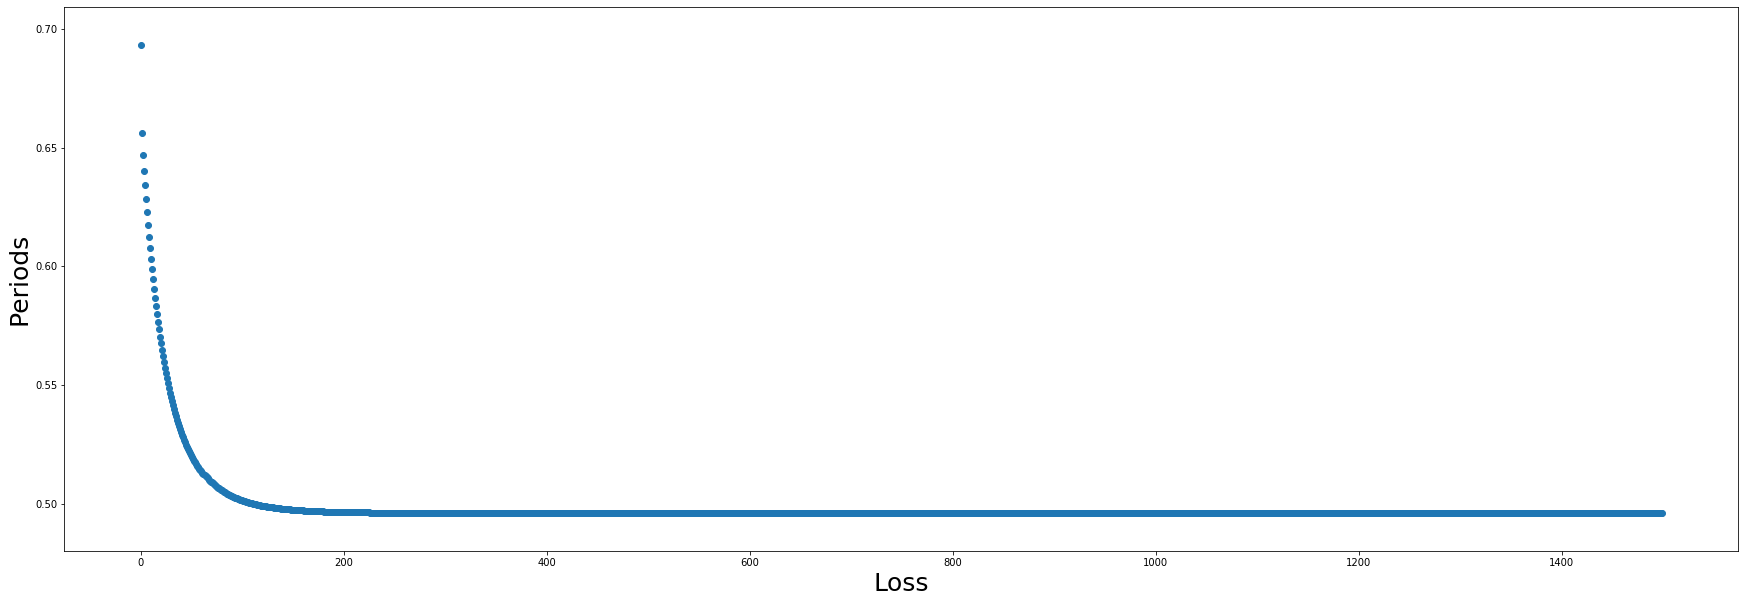

In [124]:
# Get the converge value
duplicate = model.check_converge(model.costs)
print(f'Algorithm converges at {duplicate} with 0.5 α rate.')

# Plot the lost function with respect to iterations
model.plot_loss_function(model.costs)

**What happens if α is too large?**

The optimal learning rate should swiftly approach to the minimum point. However, if the learning rate is too large, the training will happen very fast, and this will cause irregular behaviour to the loss function. Since the loss function is always increasing or always decreasing the updates will change drastically. That means the point might go from one end to an entirely different spot on the graph and may never reach the minimum end. This is called divergent behaviour.

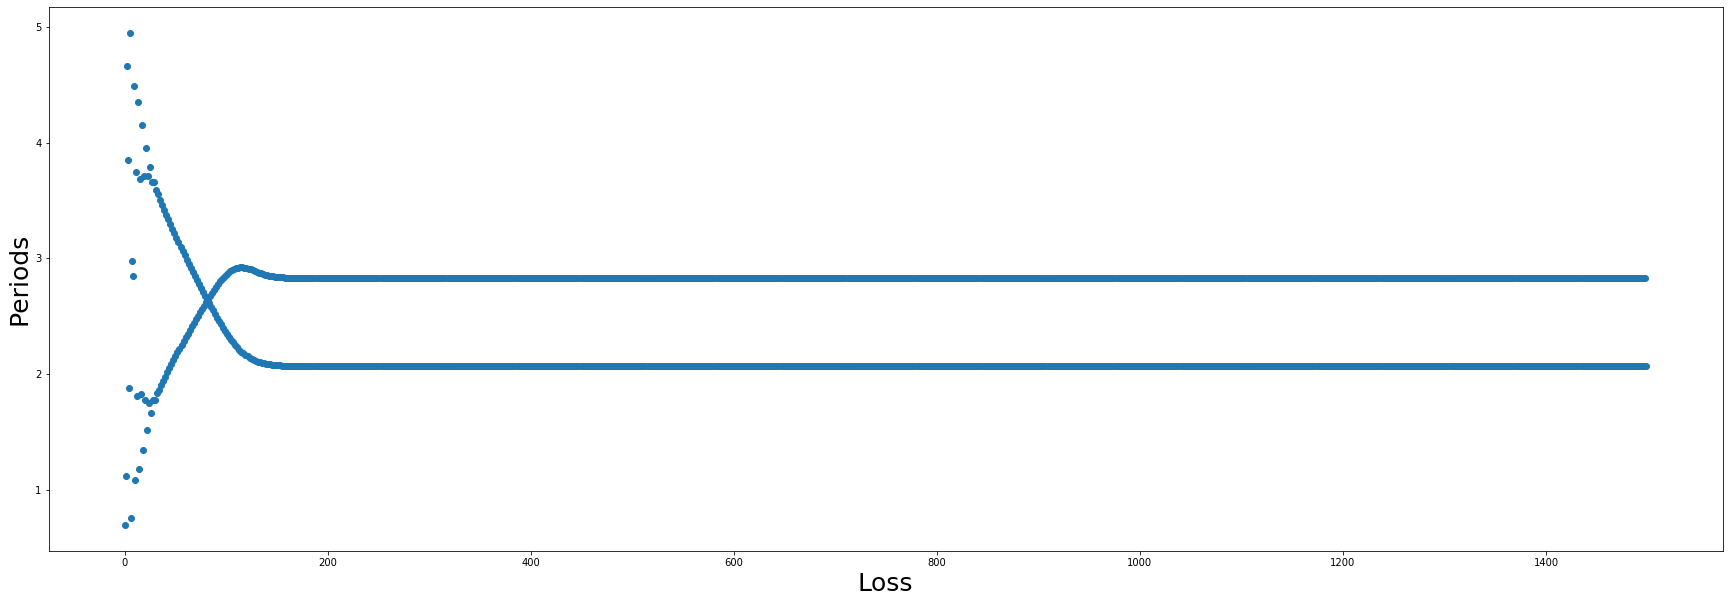

In [125]:
model_w_high_rate = LogisticRegression(lr=5, periods=1500)
model_w_high_rate.fit(X_train, y_train)
model_w_high_rate.plot_loss_function(model_w_high_rate.costs)

**Finally**

In order to go further, we need optimization. To handle that we can apply a regularization algorithm. Since the algorithm favours the high values in the coefficients, we need to use a solution to the loss function penalizing them. This means we can eliminate high values; otherwise, the model will learn all the details of the training set and overfit for our solution.  
There are two types of regularization; Laplace and Gauss. Laplace scatters the coefficient vectors and, Gauss, on the other hand, minimize the large values with small values. From this definition, I assume the Gauss regularization will be the solution to our problem. The updated loss function for the regularization can be inspected below.

In [126]:
def loss_with_gauss(self, hypothesis, y):
    '''
    Cross entropy (log) loss function with Gauss regularization
    '''
    loss = 0
    for i in len(hypothesis):
        loss += hypothesis[i]
    loss = loss * 1/2
    cross_entropy = (-y * np.log(hypothesis) - (1 - y) * np.log(1 - hypothesis))
    result = loss * cross_entropy
    return result.mean()